# Chatper 3: Graphics and Visualization

Continuing work from Mark Newman's "Computational Physics" for fun.

All work are done by me, Ken Luu. 

Please let me know if you see any errors!

**Exercise 3.1: Plotting experimental data**
In the online resources, find "sunspots.txt" which contains the observed number of sunspots on the Sun for each month since January 1749. You find two columns, month and sunspot number.

a) Write a program that reads in the data and makes a graph of sunspots as a function of time.

b) Modify your program to display only the first 1000 data points on the graph.

c) Modify your program further to calculate and plot the running average of the data, refined by 

\begin{align}
Y_{k} = \frac{1}{2r+1}\sum_{\rm{m = -r}}^{\rm{r}} y_{\rm{k+m}}
\end{align}

where r = 5 in this case ($y_{k}$ are the sunspot numbers). Have the program plot both the original data and the running average on the same graph, over the range covered by the first 1000 data points.

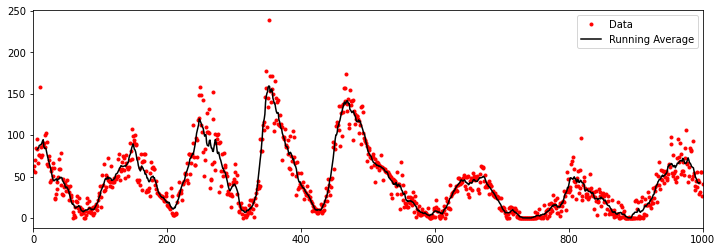

In [5]:
import numpy as np
import matplotlib.pyplot as plt 


def mainprog():

    data = np.loadtxt("sunspots.txt",float)

    r = 5
    N = 1000
    
    runavg = runningAvg(data[0:N+1,1],r)
    
    fig = plt.figure(figsize=(12,4))
    plt.plot(data[:N+1,0],data[:N+1,1],'r.',label='Data')
    plt.plot(data[r+1:N-r+1,0],runavg,'k',label="Running Average")
    plt.xlim(0,1000)
    plt.legend()
    plt.show()
    
def runningAvg(y,r):
    
    avg = []
    c = 1/(2*r+1)
    
    for k in range(r+1,len(y)-r):
        s = 0
        for m in range(-r,r+1):
            s = s + y[k+m]
        avg.append(c*s)
                
    return avg
    
    
if __name__=='__main__':
    mainprog()

**How does this code work?** 

In statistics, a running average is a calculation to analyze data points by creating a series of **averages** of different subsets of the full data set.

Lets analyze the main piece of code: 

    " avg = []
    c = 1/(2*r+1)
    
    for k in range(r+1,len(y)-r):
        s = 0
        for m in range(-r,r+1):
            #print(m)
            s = s + y[k+m]
        avg.append(c*s) "
        
Since $r=5$, the most inner loops gives

\begin{align}
Y_{k} = \frac{1}{2(5)+1}\sum_{\rm{m = -5}}^{\rm{5}} \left(y_{\rm{k-5}} + y_{\rm{k-4}} + y_{\rm{k-3}} + y_{\rm{k-2}} + y_{\rm{k-1}} + y_{\rm{k}} + y_{\rm{k+1}} + y_{\rm{k+2}} + y_{\rm{k+3}} + y_{\rm{k+4}} + y_{\rm{k+5}}\right)
\end{align}

this takes in 11 different data from the larger list, then every iteration in "k" we take the next 11, and so on...

Lets start with $k=6$ which is the first $k$ in the range, this gives us:

\begin{align}
Y_{6} = \frac{1}{2(5)+1}\sum_{\rm{m = -5}}^{\rm{5}} \left(y_{\rm{1}} + y_{\rm{2}} + y_{\rm{3}} + y_{\rm{4}} + y_{\rm{5}} + y_{\rm{6}} + y_{\rm{7}} + y_{\rm{8}} + y_{\rm{9}} + y_{\rm{10}} + y_{\rm{11}}\right).
\end{align}

Next:

\begin{align}
Y_{7} = \frac{1}{2(5)+1}\sum_{\rm{m = -5}}^{\rm{5}} \left(y_{\rm{2}} + y_{\rm{3}} + y_{\rm{4}} + y_{\rm{5}} + y_{\rm{6}} + y_{\rm{7}} + y_{\rm{8}} + y_{\rm{9}} + y_{\rm{10}} + y_{\rm{11}} + y_{\rm{12}}\right)
\end{align}

and so on!





**Execise 3.1: Plotting experimental data**

Plotting can be adapted to other kinds of plots (I think the readers know this, but I will just say it for pedagogical purposes). 

a) Make a *deltoid* curve, which is defined parametrically by the equations

\begin{align}
    \begin{split}
        x &= 2\rm{cos}\theta + \rm{cos}2\theta
        \\
        y &= 2\rm{sin}\theta - \rm{sin}2\theta
    \end{split}
\end{align}

where $0 \leq \theta < 2\pi$. Take a set of values betwen $\theta$ between zero and $2\pi$ and calculate x and y from the equations above and plot y as a function of x.

b) Make a polar plot $r = f(\theta)$ for some function $f$ by calculating $r$ for a range of values of $\theta$ and then converting $r$ and $\theta$ to Cartesian coordinates using the standard equations $x = r\rm{cos}\theta$, $y = r\rm{sin}\theta$. Plot the Galilean spiral $r = \theta^{2}$.

c) Using the same method, make polar plot of "Fey's function"

\begin{align}
r = \rm{e}^{\rm{cos}\theta} - 2\rm{cos}4\theta + \rm{sin}^{5}\frac{\theta}{12}.
\end{align}

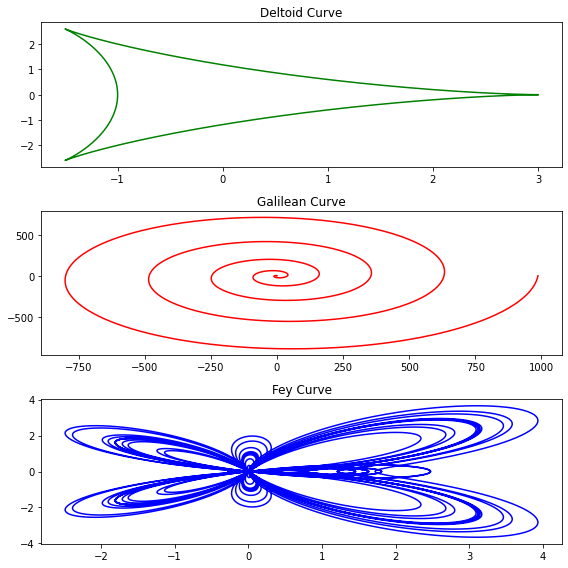

In [44]:
import numpy as np
import matplotlib.pyplot as plt 

def mainprog():
    
    thetad = np.linspace(0,2*np.pi,1000)
    thetag = np.linspace(0,10*np.pi,2000)
    thetaf = np.linspace(0,24*np.pi,4000)
    
    Dcurve = deltoid(thetad)
    Gcurve = Galilean(thetag)
    Fcurve = Fey(thetaf)
    
  
    fig,axs = plt.subplots(3,figsize=(8,8))
    axs[0].plot(Dcurve[0],Dcurve[1],color='green')
    axs[0].set_title('Deltoid Curve')
    axs[1].plot(Gcurve[0],Gcurve[1],color='red')
    axs[1].set_title('Galilean Curve')
    axs[2].plot(Fcurve[0],Fcurve[1],color='blue')
    axs[2].set_title('Fey Curve')
    fig.tight_layout()
    
    
def deltoid(theta):
    
    
    x = 2*np.cos(theta) + np.cos(2*theta)
    y = 2*np.sin(theta) - np.sin(2*theta)
    
    return x,y
    
def Galilean(theta):
    
    
    r = theta**2
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    return x,y
    
def Fey(theta):
    
    
    hold = np.exp(np.cos(theta)) - 2*np.cos(4*theta) + (np.sin(theta/12))**5
    r = hold
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    return x,y
    
    
if __name__=='__main__':
    mainprog()

**Exercise 3.3**

Download file (stm.txt) on Mark Newman's page: [here](http://www-personal.umich.edu/~mejn/cp/programs.html). This file contines a grid of values from scanning tunneling microscope measurements of the (111) surface of silicon. A scanning tunneling microscope (STM) is a device that measures the shape of a surface at the atomic level by tracking a sharp tip over the surface and measuring quantum tunneling current as a function of position.

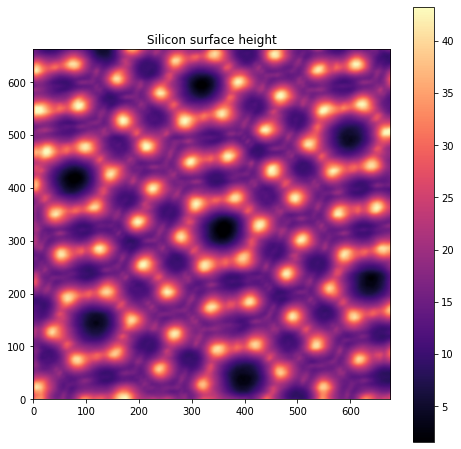

In [46]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('stm.txt',float)
fig = plt.figure(figsize=(8,8))
plt.title('Silicon surface height')
plt.imshow(data,origin='lower')
plt.set_cmap('magma')
plt.colorbar()
plt.show()

**Exercise 3.4 - 3.5**

I am skipping exercises that are using visual python. Mainly because I tried download visual python and it didn't work.

**Exercise 3.6: Deterministic chaos and the Feigenbaum plot:**
One of the most famous examples of the phenomenon of chaos is the *logistic map*, defined by the equation

\begin{align}
x^{'} = rx(1-x).
\end{align}

For a given value of the constant $r$ you take a value of $x$ (say $x=1/2$) and you feed it into the right hand side of this equation, which gives you a value of $x^{'}$. Then you take that value and feed it back on the right hand side again which gives you another value, and so on. This is an *iterative map*. You keep doing the same operation over and over on your value $x$, and one of the three things happens:

1. The value settles down to a fixed number and stays there. This is called a *fixed* point. For instance, $x=0$ is always a fixed point of the logistic map. You put $x=0$ on the right hand side and you get $x^{'}=0$ on the left.

2. It does not settle down to a single value, but it settles down into a periodic pattern, rotating around a set of values, such as say four values, repeating them in sequence over and over. This is called a *limit cycle*.

3. It goes crazy. It generates a seemingly random sequence of numbers that appear to have no rhyme or reason at all. This is *deterministic chaos*. "Chaos" because boy does it look chaotic, and "deterministic" because even though the values look random, they are not! They are entirely predictable because they are given to you by one simple equation. The behavior is *determined*, although it may not look like it.


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def mainprog():
    
    rvals = np.arange(1,4,0.01)
    x = np.full_like(rvals,0.5)
    
    log = logistic(rvals,x)
    
    
    
def logistic(r,x)

    xhold = []
    for n in range(0,1000):
        x = r*x*(1-x)
        xhold.append(x)
        
    return xhold

        
    
if __name__=='__main__':
    mainprog()

300
300


In [27]:
72/18

4.0